The goal this week is to pratice using Markdown to write descriptive text in notebooks and then look at Python data structures including the pandas module that supports data structures designed for handling the kind of data we'll be working with.  

There is probably too much work to complete here in the workshop session, but please use this notebook after the workshop to practice your Python.  Remember to commit your changes to git as you go and push back to Github when you are done.

In [ ]:
student_name = "Your Name Here"
student_id = "Your ID Here"

## Markdown Practice

Complete this section as per the instructions in the iLearn practical page.  Add the required cells below this one.

## Lists and Dictionaries

First we look at some built in Python data structures: lists and dictionaries. 

A list is a sequence of things, unlike strongly typed languages (Java, C#) a list can contain a mixture of different types - there is no type for a list of integers or a list of lists.   Here are some lists:

In [2]:
ages = [12, 99, 51, 3, 55]
names = ['steve', 'jim', 'mary', 'carrie', 'zin']
stuff = [12, 'eighteen', 6, ['another', 'list']]

1. write code to print the first and third elements of each list
2. write code to select and print everything except the first element of each list
3. write a for loop that prints each element of the 'names' list

In [3]:
print("First and third elements:")
print(f"ages: {ages[0]}, {ages[2]}")
print(f"names: {names[0]}, {names[2]}")
print(f"stuff: {stuff[0]}, {stuff[2]}")


First and third elements:
ages: 12, 51
names: steve, mary
stuff: 12, 6


In [4]:
print("\nAll elements except the first:")
print(f"ages: {ages[1:]}")
print(f"names: {names[1:]}")
print(f"stuff: {stuff[1:]}")



All elements except the first:
ages: [99, 51, 3, 55]
names: ['jim', 'mary', 'carrie', 'zin']
stuff: ['eighteen', 6, ['another', 'list']]


In [5]:
print("\nElements in 'names':")
for name in names:
    print(name)



Elements in 'names':
steve
jim
mary
carrie
zin


A dictionary is an associative array - it associates a value (any Python data type) with a key. The key is usually a string but can be any immutable type (string, number, tuple).  Here's some code that counts the occurence of words in a string.  It stores the count for each word in a dictionary using the word as a key. If the word is already stored in the dictionary, it adds one to the count, if not, it initialises the count to one.  

The second for loop iterates over the keys in the dictionary and prints one line per entry.

Modify this example to be a bit smarter:
- make sure that punctuation characters are not included as parts of a word, be careful with hyphens - should they be included or not?
- make the count use the lowercase version of a word, so that 'The' and 'the' are counted as the same word
- **Challenge**: find the first and second most frequent words in the text
- **Challenge**: take your code and write it as a function that takes a string and returns a list of words with their counts in order

In [7]:
description = """This unit introduces students to the fundamental techniques and 
tools of data science, such as the graphical display of data, 
predictive models, evaluation methodologies, regression, 
classification and clustering. The unit provides practical 
experience applying these methods using industry-standard 
software tools to real-world data sets. Students who have 
completed this unit will be able to identify which data 
science methods are most appropriate for a real-world data 
set, apply these methods to the data set, and interpret the 
results of the analysis they have performed. """

count = dict()
for word in description.split():
    if word in count:
        count[word] += 1
    else:
        count[word] = 1
        
for word in count:
    print(word, count[word])

This 1
unit 3
introduces 1
students 1
to 4
the 5
fundamental 1
techniques 1
and 3
tools 2
of 3
data 5
science, 1
such 1
as 1
graphical 1
display 1
data, 1
predictive 1
models, 1
evaluation 1
methodologies, 1
regression, 1
classification 1
clustering. 1
The 1
provides 1
practical 1
experience 1
applying 1
these 2
methods 3
using 1
industry-standard 1
software 1
real-world 2
sets. 1
Students 1
who 1
have 2
completed 1
this 1
will 1
be 1
able 1
identify 1
which 1
science 1
are 1
most 1
appropriate 1
for 1
a 1
set, 2
apply 1
interpret 1
results 1
analysis 1
they 1
performed. 1


### Correct Version

In [8]:
import string
from collections import Counter

def word_count_with_frequencies(text):
    translator = str.maketrans('', '', string.punctuation.replace('-', ''))
    modified_text = text.translate(translator)
    
    words = modified_text.lower().split()
    
    word_counts = Counter(words)
    

    most_common_words = word_counts.most_common(2)
    
    return word_counts, most_common_words
    
counts, most_common = word_count_with_frequencies(description)

# Print word counts
for word, count in counts.items():
    print(f"{word}: {count}")

# Print the most common words
print("\nMost common words:")
for word, count in most_common:
    print(f"{word}: {count}")


this: 2
unit: 3
introduces: 1
students: 2
to: 4
the: 6
fundamental: 1
techniques: 1
and: 3
tools: 2
of: 3
data: 6
science: 2
such: 1
as: 1
graphical: 1
display: 1
predictive: 1
models: 1
evaluation: 1
methodologies: 1
regression: 1
classification: 1
clustering: 1
provides: 1
practical: 1
experience: 1
applying: 1
these: 2
methods: 3
using: 1
industry-standard: 1
software: 1
real-world: 2
sets: 1
who: 1
have: 2
completed: 1
will: 1
be: 1
able: 1
identify: 1
which: 1
are: 1
most: 1
appropriate: 1
for: 1
a: 1
set: 2
apply: 1
interpret: 1
results: 1
analysis: 1
they: 1
performed: 1

Most common words:
the: 6
data: 6


## Pandas Data Frames

[Pandas](https://pandas.pydata.org) is a Python module that provides some important data structures for Data Science work and a large collection of methods for data analysis. 

The two main data structures are the [Series]() and [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).  

A Series is a one dimensional array of data, but unlike the Python list the data is indexed - the index is like the dictionary key, any immutable value like a number or string.  You can use the label to select elements from the series as well as positional values.  

A DataFrame is analogous to a spreadsheet - a two dimensional table of data with indexed rows and named columns. 

You should read up on these and follow the examples in the text.  Here are a few exercises to complete with data frames.

You are given three csv files containing sample data.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ds1 = pd.read_csv('files/ds1.csv')
ds2 = pd.read_csv('files/ds2.csv')
ds3 = pd.read_csv('files/ds3.csv')

Write code below to read one of these data files into a pandas data frame and:
- show the first few rows: .head
- find the summary data for each column: .describe
- select just those rows where the value of x and y is over 50
- select the column 'x' and create a series
- plot the 'x' series as a line graph
- plot the dataframe as a scatterplot

Once you have the code for this, you can change the file you use for input of the data (ds2, ds3) and re-run the following cells to see the different output that is generated

In [8]:
ds1.head()

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


In [9]:
ds2.head()

,x,y
0,32.331110,61.411101
1,53.421463,26.186880
2,63.920202,30.832194
3,70.289506,82.533649
4,34.118830,45.734551


In [10]:
ds3.head()

,x,y
0,58.213608,91.881892
1,58.196054,92.214989
2,58.718231,90.310532
3,57.278373,89.907607
4,58.082020,92.008145


In [11]:
print("For ds1 dataset")
print(ds1.describe())
print("\nFor ds2 dataset")
print(ds2.describe())
print("\nFor ds3 dataset")
print(ds3.describe())


For ds1 dataset
                x           y
count  142.000000  142.000000
mean    54.263273   47.832253
std     16.765142   26.935403
min     22.307700    2.948700
25%     44.102600   25.288450
50%     53.333300   46.025600
75%     64.743600   68.525675
max     98.205100   99.487200

For ds2 dataset
                x           y
count  142.000000  142.000000
mean    54.266100   47.834721
std     16.769825   26.939743
min     15.560750    0.015119
25%     39.724115   24.625892
50%     53.340296   47.535269
75%     69.146597   71.803148
max     91.639961   97.475771

For ds3 dataset
                x           y
count  142.000000  142.000000
mean    54.267341   47.839545
std     16.768959   26.930275
min     27.024603   14.365590
25%     41.034210   20.374135
50%     56.534732   50.110554
75%     68.711493   63.548584
max     86.435897   92.214989


In [12]:
print("\nfor ds1")
selected_rows_ds1 = ds1[(ds1['x'] > 50) & (ds1['y'] > 50)]
print(selected_rows_ds1)
print("\nfor ds2")
selected_rows_ds2 = ds2[(ds2['x'] > 50) & (ds2['y'] > 50)]
print(selected_rows_ds2)
print("\nFor ds3")
selected_rows_ds3 = ds3[(ds3['x'] > 50) & (ds3['y'] > 50)]
print(selected_rows_ds3)


for ds1
          x        y
0   55.3846  97.1795
1   51.5385  96.0256
22  53.0769  55.6410
23  56.6667  56.0256
24  59.2308  57.9487
25  61.2821  62.1795
26  61.5385  66.4103
27  61.7949  69.1026
28  57.4359  55.2564
60  70.5128  53.7180
61  71.5385  60.6410
62  71.5385  64.4872
63  69.4872  69.4872
67  53.0769  85.2564
68  55.3846  86.0256
69  56.6667  86.0256
70  56.1538  82.9487
71  53.8462  80.6410
72  51.2821  78.7180
78  57.9487  99.4872
79  61.7949  99.1026
80  64.8718  97.5641
81  68.4615  94.1026
82  70.7692  91.0256
83  72.0513  86.4103
84  73.8462  83.3333
85  75.1282  79.1026
86  76.6667  75.2564
87  77.6923  71.4103
88  79.7436  66.7949
89  81.7949  60.2564
90  83.3333  55.2564
91  85.1282  51.4103

for ds2
             x          y
3    70.289506  82.533649
6    53.259129  97.475771
8    67.980539  80.957165
11   71.790768  71.065467
13   64.937436  81.554205
19   76.166920  75.936170
29   64.568264  83.639634
30   74.021694  76.128275
32   74.189037  68.133583
34   75.

In [13]:
print("For ds1 select column 'x' and create a series")
x_series_ds1 = ds1['x']
print(x_series_ds1)

print("\nFor ds2 select column 'x' and create a series")
x_series_ds2 = ds2['x']
print(x_series_ds2)

print("\nFor ds3 select column 'x' and create a series")
x_series_ds3 = ds3['x']
print(x_series_ds3)

For ds1 select column 'x' and create a series
0      55.3846
1      51.5385
2      46.1538
3      42.8205
4      40.7692
        ...   
137    39.4872
138    91.2821
139    50.0000
140    47.9487
141    44.1026
Name: x, Length: 142, dtype: float64

For ds2 select column 'x' and create a series
0      32.331110
1      53.421463
2      63.920202
3      70.289506
4      34.118830
         ...    
137    59.851838
138    48.960460
139    46.844855
140    39.963022
141    66.704944
Name: x, Length: 142, dtype: float64

For ds3 select column 'x' and create a series
0      58.213608
1      58.196054
2      58.718231
3      57.278373
4      58.082020
         ...    
137    43.722551
138    79.326078
139    56.663974
140    57.821789
141    58.243172
Name: x, Length: 142, dtype: float64


Graph for ds1


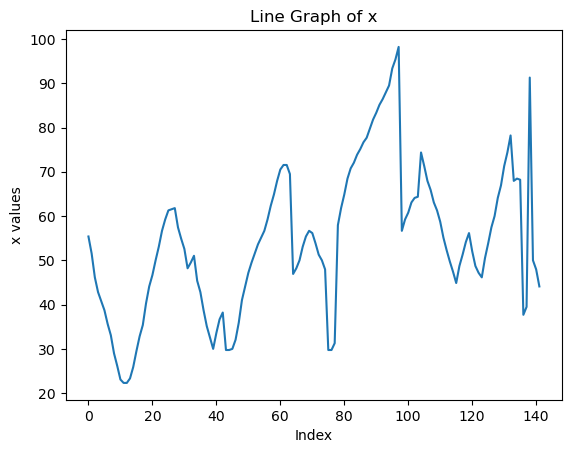


Graph for ds2


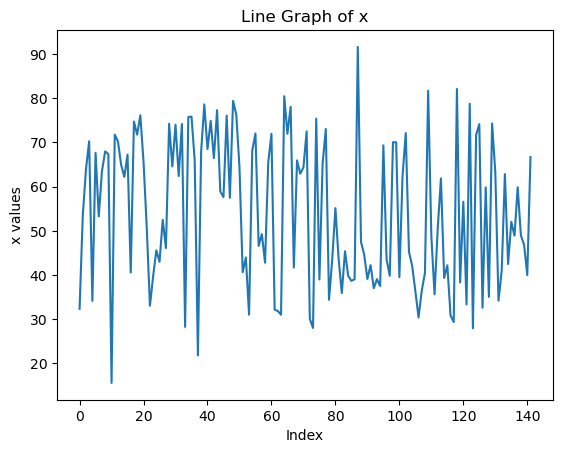


Graph for ds3


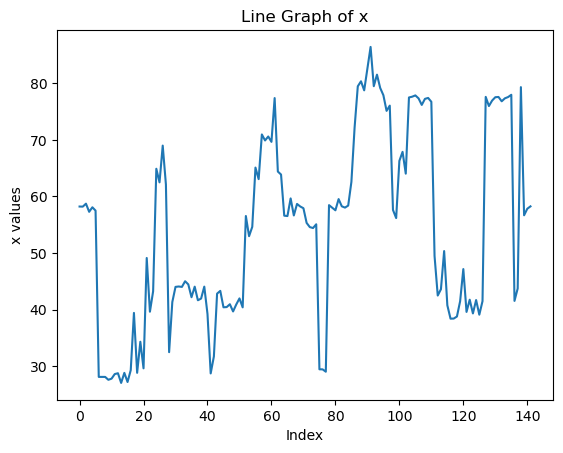

In [14]:
print("Graph for ds1")
plt.plot(x_series_ds1)
plt.title('Line Graph of x')
plt.xlabel('Index')
plt.ylabel('x values')
plt.show()

print("\nGraph for ds2")
plt.plot(x_series_ds2)
plt.title('Line Graph of x')
plt.xlabel('Index')
plt.ylabel('x values')
plt.show()

print("\nGraph for ds3")
plt.plot(x_series_ds3)
plt.title('Line Graph of x')
plt.xlabel('Index')
plt.ylabel('x values')
plt.show()



Scatter Plot for ds1


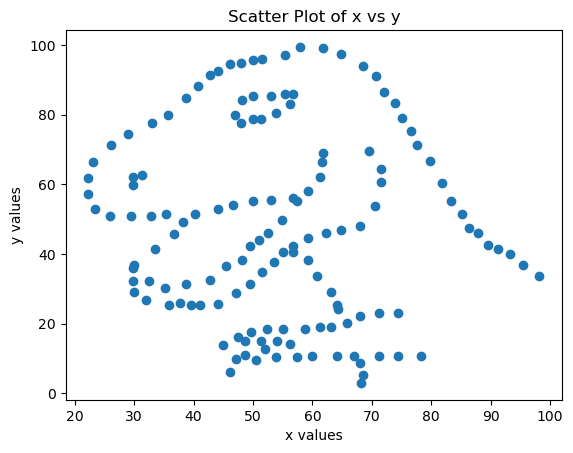


Scatter Plot for ds2


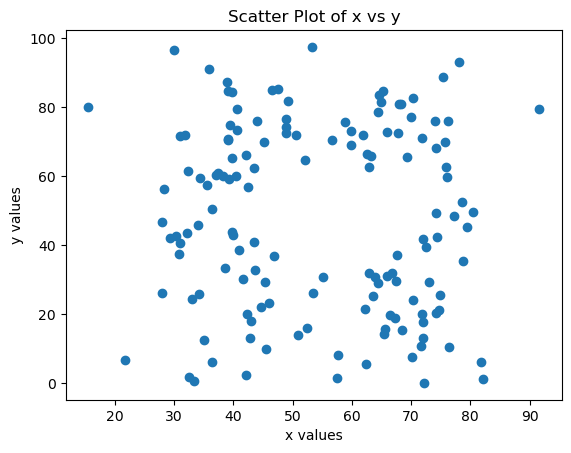


Scatter Plot for ds3


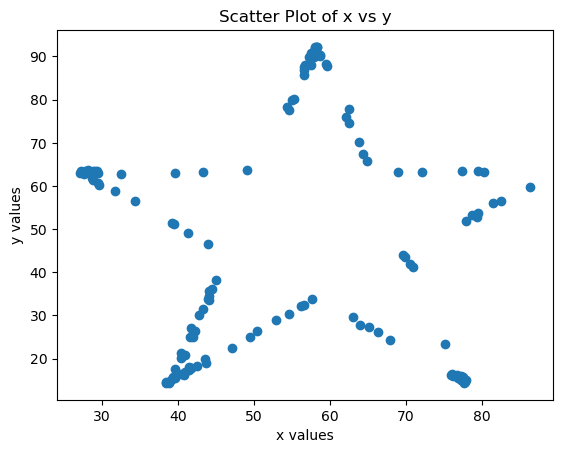

In [15]:
# Plot the dataframe as a scatterplot
print("Scatter Plot for ds1")
plt.scatter(ds1['x'], ds1['y'])
plt.title('Scatter Plot of x vs y')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

print("\nScatter Plot for ds2")
plt.scatter(ds2['x'], ds2['y'])
plt.title('Scatter Plot of x vs y')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

print("\nScatter Plot for ds3")
plt.scatter(ds3['x'], ds3['y'])
plt.title('Scatter Plot of x vs y')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()


## Checkpoint

Congratulations! you have finished the required task for Week 2. Since you got this empty (without your code and output) notebook by downloading from iLearn, place this notebook (Workshop Week 2.ipynb) into your local copy of your Github repository (e.g. practical-workshops-sonitsingh)and commit your work with a suitable commit message and push your changes back to your Github repository. Show your tutor your updated Github repository to get your checkpoint mark.

# Further Practice

If you finish this task you can practice more with pandas data frames by following the examples in the text, section 2.6.  The CSV file that they use in that section is available in the `files` directory of this repository as `educ_figdp_1_Data.csv`.   

In [16]:
edufile = pd.read_csv('files/educ_figdp_1_Data.csv')
edufile.head()

,TIME,GEO,INDIC_ED,Value
0,2002,European Union (27 countries),Total public expenditure on education as % of ...,5.10
1,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.14
2,2002,European Union (27 countries),Total public expenditure on education as % of ...,2.32
3,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.15
4,2002,European Union (27 countries),Total public expenditure on education as % of ...,0.50


In [17]:
print(edufile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TIME      4920 non-null   int64 
 1   GEO       4920 non-null   object
 2   INDIC_ED  4920 non-null   object
 3   Value     4920 non-null   object
dtypes: int64(1), object(3)
memory usage: 153.9+ KB
None


In [18]:
print(edufile.describe())

              TIME
count  4920.000000
mean   2006.500000
std       2.872573
min    2002.000000
25%    2004.000000
50%    2006.500000
75%    2009.000000
max    2011.000000


In [19]:
print(edufile.isnull().sum())

TIME        0
GEO         0
INDIC_ED    0
Value       0
dtype: int64


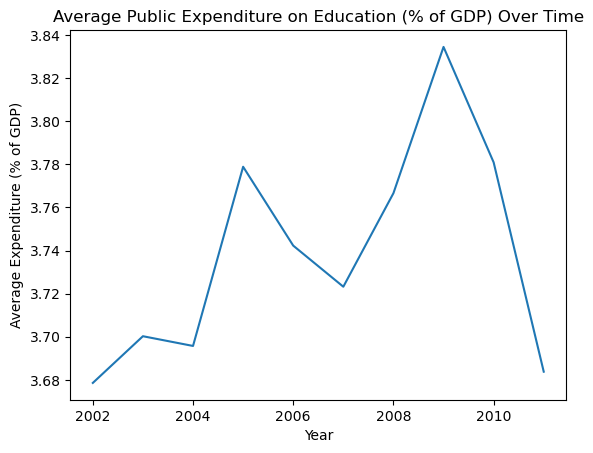

In [20]:
edufile['Value'] = pd.to_numeric(edufile['Value'], errors='coerce')
# Group by TIME and calculating mean Value for each year
time_trend = edufile.groupby('TIME')['Value'].mean().reset_index()

# Plotting
import matplotlib.pyplot as plt

plt.plot(time_trend['TIME'], time_trend['Value'])
plt.title('Average Public Expenditure on Education (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Expenditure (% of GDP)')
plt.show()
